<a href="https://colab.research.google.com/github/Nancy2615/nancy/blob/main/Clase11abril18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 

In [2]:
dftip=sns.load_dataset('tips')
dftip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
cor=dftip.corr()

<ipython-input-3-ec03daf118b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=dftip.corr()


<ipython-input-4-2daeac25b643>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre=dftip.corr(method='pearson')


<Axes: >

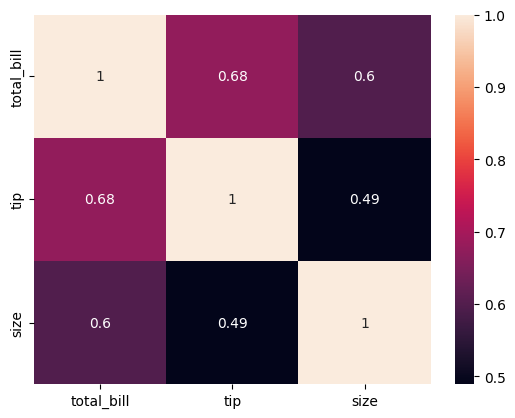

In [4]:
corre=dftip.corr(method='pearson')
plt.figure()
sns.heatmap(corre,annot=True)

In [5]:
mlr=smf.ols(formula='tip~total_bill',data=dftip).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           6.69e-34
Time:                        21:47:06   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coeficiente asociado entre variables dependientes e independientes. coeficiente que mide su peso sobre la variable independiente. ejmplo total_bill

probabilidad asociada a la t_student mayor a 3, es pq la probabilidad es menor a 0.05y es buena la relacion entre las variables

In [6]:
mlr.params

Intercept     0.920270
total_bill    0.105025
dtype: float64

$$tip=0.6689+0.093*TB+0.193*size$$

<Axes: xlabel='total_bill', ylabel='tip'>

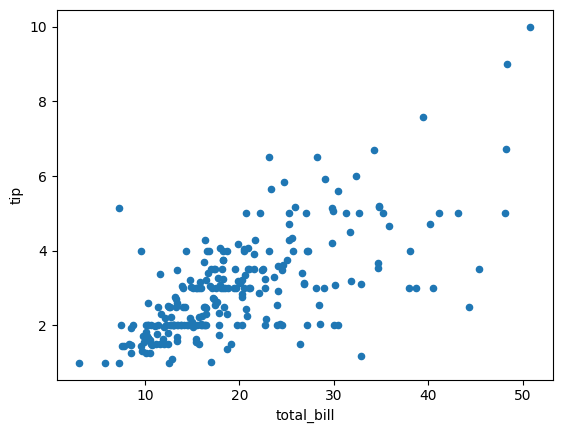

In [7]:
dftip.plot(kind='scatter',x='total_bill',y='tip')

In [8]:
pred=mlr.predict(pd.DataFrame(dftip['total_bill']))
pred

0      2.704636
1      2.006223
2      3.126835
3      3.407250
4      3.502822
         ...   
239    3.969131
240    3.774836
241    3.301175
242    2.791807
243    2.892630
Length: 244, dtype: float64

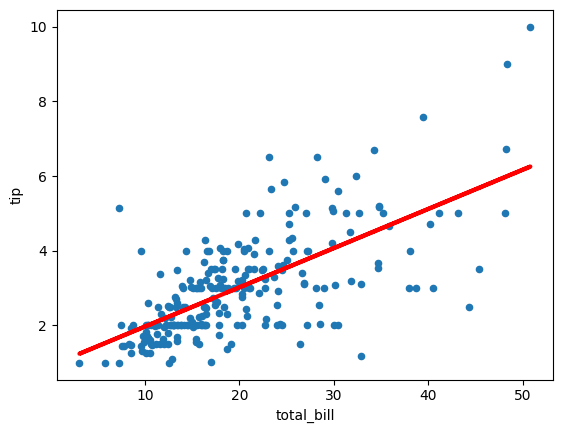

In [ ]:
dftip.plot(kind='scatter',x='total_bill',y='tip')
plt.plot(pd.DataFrame(dftip['total_bill']),pred,c='red',linewidth=3)

<Axes: xlabel='total_bill', ylabel='tip'>

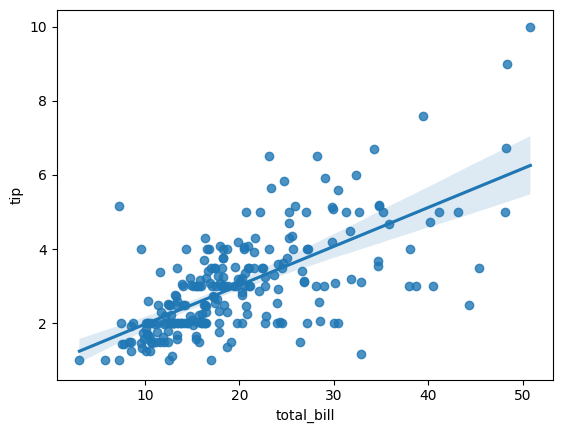

In [ ]:
sns.regplot(x='total_bill',y='tip',data=dftip)

<Axes: xlabel='size', ylabel='tip'>

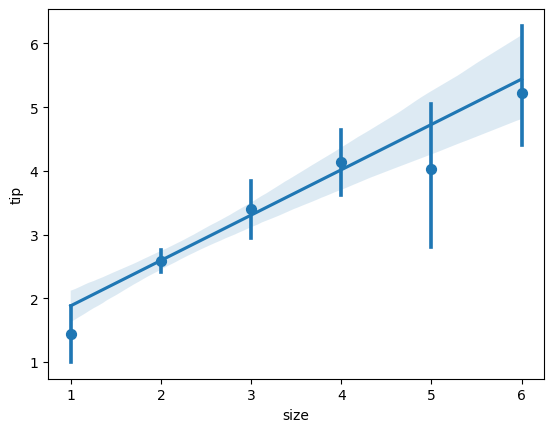

In [ ]:
import numpy as np
sns.regplot(x='size',y='tip',data=dftip, x_estimator=np.mean)